### Notebook di test per iniziare ad implementare gli algoritmi di ML sul dataset di prova

Primo Algoritmo: Decision Tree

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Carica il dataset che abbiamo creato in precedenza
file_path = "C:/Users/Lorenzo/Desktop/Università/Magistrale/Tesi/DART-Ejecta-Fate-Prediction/data/raw/dummy_ejecta_dataset.csv"
df = pd.read_csv(file_path)

print("--- Anteprima dei dati caricati: ---")
print(df.head())

# 1. SEPARAZIONE FEATURES (X) E TARGET (y)
# Le feature sono tutte le colonne tranne 'id_particella' (che è solo un identificatore)
# e 'destino' (che è il nostro target).
X = df.drop(['id_particella', 'destino'], axis=1)

# Il target è la colonna 'destino'
y = df['destino']

# 2. CODIFICA DEL TARGET
# Gli algoritmi di ML richiedono input numerici. Dobbiamo convertire le etichette
# testuali ('impatto', 'fuga', 'sopravvivenza') in numeri (0, 1, 2).
label_encoder = LabelEncoder() #LabelEncoder da un codice a ciascuna possibile label
y_encoded = label_encoder.fit_transform(y)

# Stampiamo le feature e il target per verifica
print("\n--- Feature (X) utilizzate per l'addestramento: ---")
print(X.head())
print("\n--- Target (y) codificato: ---")
print(y_encoded[:5])
print(f"Le classi {label_encoder.classes_} sono state mappate a {label_encoder.transform(label_encoder.classes_)}")

--- Anteprima dei dati caricati: ---
   id_particella  pos_x_m  pos_y_m  pos_z_m  vel_x_ms  vel_y_ms  vel_z_ms  \
0              1  19.9030  67.4731 -38.0087    0.0501    0.1688   -0.0949   
1              2  34.9072  65.9746 -28.5569    0.0870    0.1653   -0.0714   
2              3 -26.2311   2.6385 -75.6511   -0.0653    0.0063   -0.1889   
3              4 -17.9695  77.6405   6.3397   -0.0452    0.1942    0.0157   
4              5  41.1885  64.8654  22.2446    0.1026    0.1624    0.0556   

   dimensione_m        destino  
0        0.2718  sopravvivenza  
1        2.2977        impatto  
2        0.0303           fuga  
3        0.4187  sopravvivenza  
4        0.3600           fuga  

--- Feature (X) utilizzate per l'addestramento: ---
   pos_x_m  pos_y_m  pos_z_m  vel_x_ms  vel_y_ms  vel_z_ms  dimensione_m
0  19.9030  67.4731 -38.0087    0.0501    0.1688   -0.0949        0.2718
1  34.9072  65.9746 -28.5569    0.0870    0.1653   -0.0714        2.2977
2 -26.2311   2.6385 -75.6511  

In [15]:
# Dividiamo i dati: 80% per l'addestramento, 20% per il test.
# 'random_state=42' assicura che la divisione sia sempre la stessa ogni volta che eseguiamo lo script.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nDimensioni del Training Set: {X_train.shape}")
print(f"Dimensioni del Test Set: {X_test.shape}")


Dimensioni del Training Set: (8000, 7)
Dimensioni del Test Set: (2000, 7)


In [16]:
# Creiamo un'istanza del modello.
# 'max_depth=5' è un iperparametro per evitare che l'albero diventi troppo complesso e vada in overfitting.
# Possiamo sperimentare con questo valore in seguito.
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Addestriamo il modello usando i dati di training
print("\nInizio l'addestramento del modello...")
clf.fit(X_train, y_train)
print("Addestramento completato!")


Inizio l'addestramento del modello...
Addestramento completato!


In [17]:
# Facciamo le predizioni sul test set
y_pred = clf.predict(X_test)

# Valutiamo il modello

# 1. ACCURACY: la percentuale di predizioni corrette
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\n--- VALUTAZIONE DEL MODELLO ---")
print(f"Accuracy del modello: {accuracy:.4f}")

# 2. CLASSIFICATION REPORT: una metrica più dettagliata
# Mostra precision, recall e f1-score per ogni singola classe.
print("\n--- Classification Report: ---")
report = metrics.classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


--- VALUTAZIONE DEL MODELLO ---
Accuracy del modello: 0.8330

--- Classification Report: ---
               precision    recall  f1-score   support

         fuga       0.84      0.77      0.80       407
      impatto       0.89      0.91      0.90       854
sopravvivenza       0.77      0.78      0.78       739

     accuracy                           0.83      2000
    macro avg       0.83      0.82      0.82      2000
 weighted avg       0.83      0.83      0.83      2000



C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_15472\3451600411.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(class_names)) # Scegli una colormap


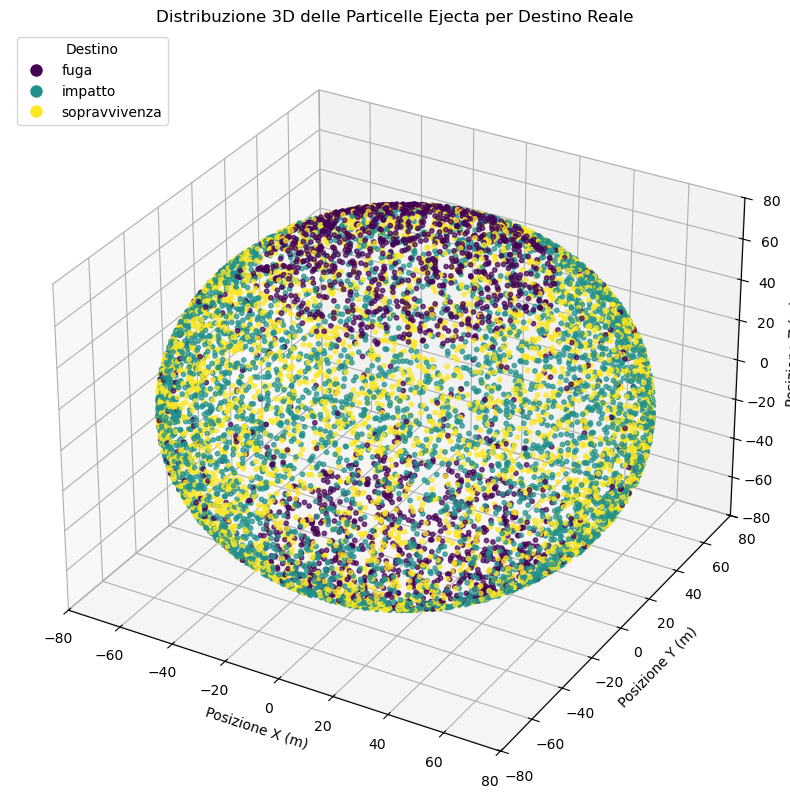

In [18]:
df = pd.read_csv(file_path)

# Estrai le coordinate di posizione e il destino
x = df['pos_x_m']
y = df['pos_y_m']
z = df['pos_z_m']
destino = df['destino']

# Codifica le etichette di destino in numeri per poterle colorare
# Questo è lo stesso LabelEncoder usato per il training
label_encoder = LabelEncoder()
destino_encoded = label_encoder.fit_transform(destino)

# Ottieni i nomi delle classi originali e mappa i colori
class_names = label_encoder.classes_
colors = plt.cm.get_cmap('viridis', len(class_names)) # Scegli una colormap

# Prepara la figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotta ogni punto
scatter = ax.scatter(x, y, z, c=destino_encoded, cmap=colors, s=10, alpha=0.7)

# Etichette degli assi
ax.set_xlabel('Posizione X (m)')
ax.set_ylabel('Posizione Y (m)')
ax.set_zlabel('Posizione Z (m)')
ax.set_title('Distribuzione 3D delle Particelle Ejecta per Destino Reale')

# Aggiungi una legenda per i colori
legend_elements = []
for i, class_name in enumerate(class_names):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                      markerfacecolor=colors(i), markersize=10))
ax.legend(handles=legend_elements, title="Destino", loc='upper left')

# Imposta gli stessi limiti per gli assi per una migliore visualizzazione sferica
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

# --- OPZIONALE: Visualizzazione del destino predetto (richiede il modello addestrato) ---
# Se vuoi visualizzare il destino predetto dal modello decision tree, dovrai
# eseguire il codice dell'albero decisionale prima e ottenere y_pred.
# Poi puoi adattare il plot sopra:
#
# fig_pred = plt.figure(figsize=(12, 10))
# ax_pred = fig_pred.add_subplot(111, projection='3d')
# # Usa X_test e y_pred del tuo script di training dell'albero decisionale
# ax_pred.scatter(X_test['pos_x_m'], X_test['pos_y_m'], X_test['pos_z_m'],
#                 c=y_pred, cmap=colors, s=10, alpha=0.7)
# ax_pred.set_xlabel('Posizione X (m)')
# ax_pred.set_ylabel('Posizione Y (m)')
# ax_pred.set_zlabel('Posizione Z (m)')
# ax_pred.set_title('Distribuzione 3D delle Particelle Ejecta per Destino PREDETTO')
# ax_pred.legend(handles=legend_elements, title="Destino", loc='upper left')
# plt.show()